# Classification(Lesson 1)
## KNN(K-Nearest Neighbors)

### First of all import needed packages

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [3]:
Data_Frame = pd.read_csv('Customers.csv')
# Show the first 5 lines
Data_Frame.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
# This gives you the number of lines
print('How many lines(rows) we have : ',len(Data_Frame))
print('How many rows and columns we have(rows,columns) : ',Data_Frame.shape)
# 1000 rows and 12 columns

How many lines(rows) we have :  1000
How many rows and columns we have(rows,columns) :  (1000, 12)


In [9]:
Data_Frame['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

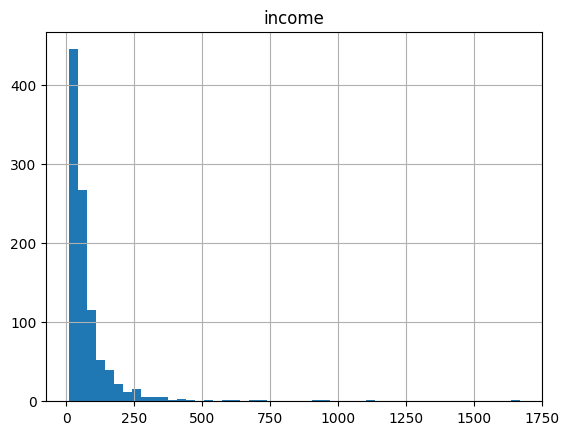

In [10]:
Data_Frame.hist(column='income',bins=50)
# Every small blue line is 50

In [11]:
# Show your the columns
Data_Frame.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [15]:
# scikit-learn does not work with pandas and it works with numpy and it knows only normal matrix
# Seperating our inputs(Xs) from Y and split some specific columns
x = Data_Frame[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values # .astype(float)
# And show first 5 lines
x[0:5]
print(x)

[[ 2. 13. 44. ...  0.  0.  2.]
 [ 3. 11. 33. ...  0.  0.  6.]
 [ 3. 68. 52. ...  0.  1.  2.]
 ...
 [ 3. 67. 59. ...  0.  1.  1.]
 [ 3. 70. 49. ...  0.  1.  1.]
 [ 3. 50. 36. ...  0.  1.  3.]]


In [16]:
# Seperating our outouts(Y) from X
y = Data_Frame[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

### Normalize data

In [27]:
print(x[0:5])
print('(Rows,Columns) =',x.shape)

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
(Rows,Columns) = (1000, 11)


In [28]:
scaler = preprocessing.StandardScaler().fit(x)

In [29]:
normalized_x = scaler.transform(x.astype(float))
print(normalized_x[0:5])
print(normalized_x.shape)

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]
(1000, 11)


### Split your data into test and train

In [31]:
from sklearn.model_selection import train_test_split
# Ratio of 20 % for test and 80 % for train 
# random_satet make a constant shuffled array for each time you run the programm and also constant for everyone(works as a key)
# The shuffling will be changed if you change the random_state value
x_train , x_test , y_train , y_test = train_test_split(normalized_x,y,
                                                      test_size=0.2,
                                                      random_state=4)
print(f'Train_x : {x_train.shape}\nTrain_y : {y_train.shape}')
print('\n')
print(f'Test_x : {x_test.shape}\nTest_y : {y_test.shape}')

Train_x : (800, 11)
Train_y : (800, 1)


Test_x : (200, 11)
Test_y : (200, 1)


### Create and run your model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# Let's try k with 4 for instance
k = 4
# Train the model
neighbor = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neighbor

C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
# Now you can make a prediction
predicted_y = neighbor.predict(x_test)
print('These are predicted values : ',predicted_y[0:5])
print('These are actual values : ',y[0:5].reshape(1,5)[0])

These are predicted values :  [1 1 3 2 4]
These are actual values :  [1 4 3 1 3]


### Evaluate the accuracy of the model

In [41]:
from sklearn.metrics import accuracy_score
print('Train set accuracy : ',accuracy_score(y_train,neighbor.predict(x_train))*100)
print('Test set accuracy : ',accuracy_score(y_test,predicted_y)*100)

Train set accuracy :  54.75
Test set accuracy :  32.0


In [63]:
# Now les't do what we did for k from 1 to 10 and find the best k
Ks = 30
# Consider these two as a matrix of zero
mean_accuray = np.zeros((Ks-1))
standard_deviation = np.zeros((Ks-1))

for i in range(1,Ks) :
    neighbor = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    predicted_y = neighbor.predict(x_test)
    # replacing zeros with new numbers
    mean_accuray[i-1] = accuracy_score(y_test,predicted_y)
    standard_deviation[i-1] = np.std(predicted_y==y_test)/np.sqrt(predicted_y.shape[0])
mean_accuray

C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 ])

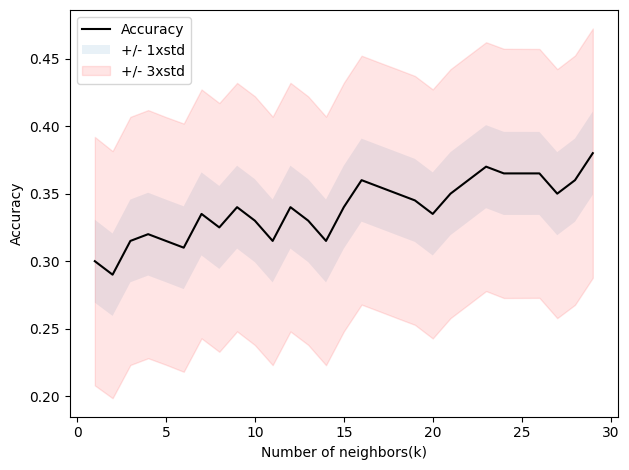

In [64]:
plt.plot(range(1,Ks),mean_accuray,'black')
plt.fill_between(range(1,Ks),mean_accuray-1*standard_deviation,mean_accuray+1*standard_deviation,alpha=0.1)
plt.fill_between(range(1,Ks),mean_accuray-3*standard_deviation,mean_accuray+3*standard_deviation,alpha=0.1,color='red')
plt.legend(('Accuracy', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(k)')
plt.tight_layout()
plt.show()

In [66]:
print('The best accuracy is :',int(mean_accuray.max()*100),'%','and the best k is',mean_accuray.argmax()+1)

The best accuracy is : 38 % and the best k is 29


### Example

In [65]:
# a new cunstomer with these new features
new_customer = [[2,13,44,1,9,1500,4,5,0,0,2]]
scaled_new_customer = scaler.transform(new_customer)
# Predict in which category from 1 to 4 he or she will be
print('This person is located at category number ',int(neighbor.predict(scaled_new_customer)[0]))

This person is located at category number  4
